# Dataset para testar o método do meu TCC para o artigo
## 1 . Preparando o Dataset

In [1]:
import pywt
import statsWaveletFilt.cusum as cus
import statsWaveletFilt.filtration as fil
import statsWaveletFilt.miscellaneous as misc
import statsWaveletFilt.signals as sig
import statsWaveletFilt.threshold as threshold

### 1.1 Atualizando as funções que geram os sinais do Donoho

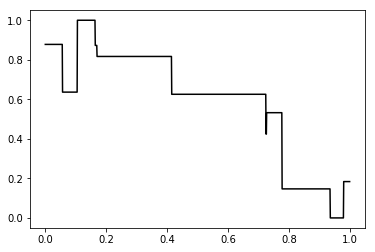

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x, y = sig.blockFunction(ht = 10)

plt.plot(x, y, 'k-')
plt.show()

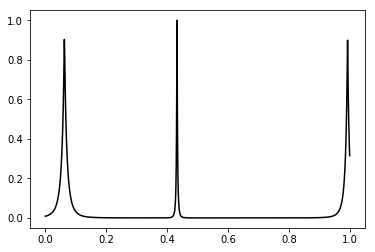

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x, y = sig.bumpFunction(wht = 3)

plt.plot(x, y, 'k-')
plt.show()

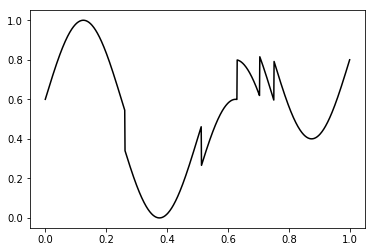

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x, y = sig.heavsineFunction(heavs=5)

plt.plot(x, y, 'k-')
plt.show()

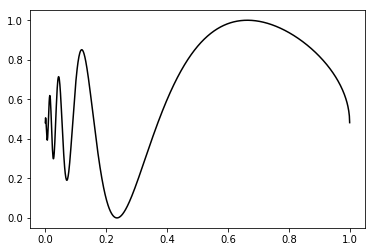

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x, y = sig.dopplerFunction(dim=1024, fq=1/5)

plt.plot(x, y, 'k-')
plt.show()

### 1.2 Montagem dos cenários sem ruído a partir destes dados (pandas.DataFrame)

In [12]:
# Com o sinal Block
blocks = [blockFunction(ht=i) for i in range(1, 11)]

In [13]:
# Com o sinal Bump
bumps = [bumpFunction(wht=i) for i in range(1, 11)]

In [14]:
# Com o sinal Doppler
fq = np.arange(0, 2, .2)
doppler = [dopplerFunction(fq=fqi) for fqi in fq]

In [15]:
# Com o sinal Heavsine
heavsine = [heavsineFunction(heavs=i) for i in range(10)]

#### Appendix: Printing all waves, just for show

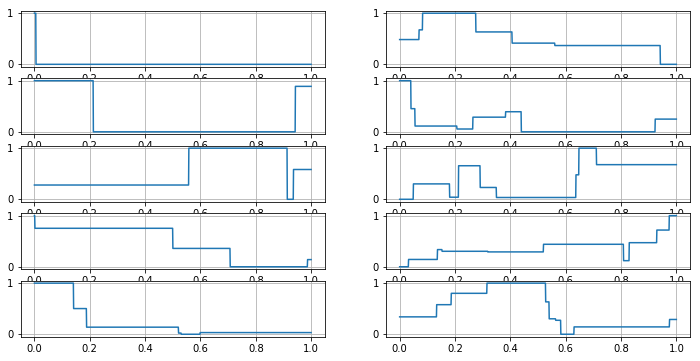

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12, 6)

for i, signal in enumerate(blocks):
    x, y = signal
    tmp_ax = ax[i%5][i//5]
    tmp_ax.plot(x, y)
    tmp_ax.grid(True)
plt.show()

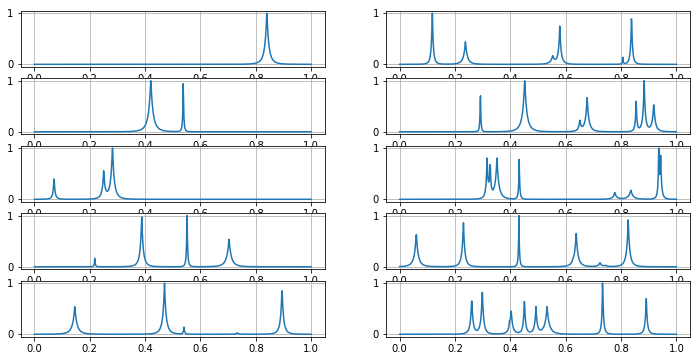

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12, 6)

for i, signal in enumerate(bumps):
    x, y = signal
    tmp_ax = ax[i%5][i//5]
    tmp_ax.plot(x, y)
    tmp_ax.grid(True)
plt.show()

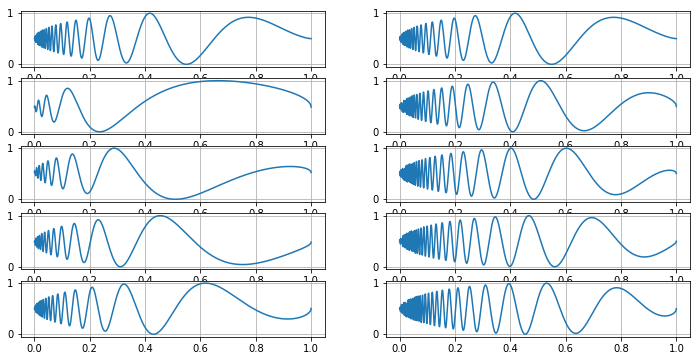

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12, 6)

for i, signal in enumerate(doppler):
    x, y = signal
    tmp_ax = ax[i%5][i//5]
    tmp_ax.plot(x, y)
    tmp_ax.grid(True)
plt.show()

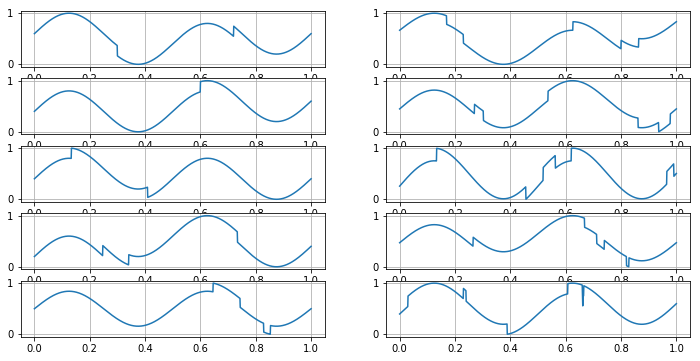

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(12, 6)

for i, signal in enumerate(heavsine):
    x, y = signal
    tmp_ax = ax[i%5][i//5]
    tmp_ax.plot(x, y)
    tmp_ax.grid(True)
plt.show()

In [27]:
blocks_dict = {'x': blocks[0][0], 'type': 'Block'}
signals = []

for signal in blocks:
    _, y = signal
    signals.append(y)
blocks_dict['ys'] =  signals

In [28]:
bumps_dict = {'x': bumps[0][0], 'type': 'Bump'}
signals = []

for signal in bumps:
    _, y = signal
    signals.append(y)
bumps_dict['ys'] =  signals

In [29]:
doppler_dict = {'x': doppler[0][0], 'type': 'Doppler'}
signals = []

for signal in doppler:
    _, y = signal
    signals.append(y)
doppler_dict['ys'] =  signals

In [30]:
heavsine_dict = {'x': heavsine[0][0], 'type': 'Heavsine'}
signals = []

for signal in heavsine:
    _, y = signal
    signals.append(y)
heavsine_dict['ys'] =  signals

In [33]:
donoho_signals = {'block': blocks_dict,
                  'bump': bumps_dict,
                  'doppler': doppler_dict,
                  'heavsine': heavsine_dict}

In [39]:
import pickle

with open('donoho_signals.pkl', 'wb') as p_pkl:
    pickle.dump(donoho_signals, p_pkl)

#### Testing

In [6]:
import pickle

with open('donoho_signals.pkl', 'rb') as p_pkl:
    donoho_signals = pickle.load(p_pkl)

In [7]:
donoho_signals.keys()

dict_keys(['block', 'bump', 'doppler', 'heavsine'])

### 1.3 Integração o pandas.DataFrame de ECGs

In [55]:
import pickle

with open('ecgs.pkl', 'rb') as p_pkl:
    ecgs = pickle.load(p_pkl)

In [56]:
types = list(ecgs.keys())

In [57]:
types

['NSR',
 'APB',
 'AFL',
 'AFIB',
 'SVTA',
 'WPW',
 'PVC',
 'Bigeminy',
 'Trigeminy',
 'VT',
 'IVR',
 'VFL',
 'Fusion',
 'LBBBB',
 'RBBBB',
 'SDHB',
 'PR']

In [65]:
import random

ecgsSampl = {}

for type_ in types:
    tmp_ecgSampl = {'id': ecgs[type_]['id'], 'type': ecgs[type_]['type'], 'type': ecgs[type_]['name']}
    ySamples = ecgs[type_]['ySamples']
    random.shuffle(ySamples)
    tmp_samples = []
    for i, sample in enumerate(ySamples[:4]):
        if i == 3:
            tmp_samples.append(sample[:1024])
        else:
            tmp_samples.append(sample[:1024])
            tmp_samples.append(sample[1024:2048])
            tmp_samples.append(sample[2048:3072])
    tmp_ecgSampl['ySamples'] = tmp_samples

    ecgsSampl[ecgs[type_]['type']] = tmp_ecgSampl

In [74]:
import pickle

with open('sel_ecgs.pkl', 'wb') as p_pkl:
    pickle.dump(ecgsSampl, p_pkl)

## 2. Teste do dataset nos métodos

In [12]:
# import sys
# sys.path.insert(0, r"C:\Users\tiarl\Dropbox\codes\filtragemDeSinais_offline\statsWaveletFiltr")

import pywt
import statsWaveletFilt.cusum as cus
import statsWaveletFilt.filtration as fil
import statsWaveletFilt.miscellaneous as misc
import statsWaveletFilt.signals as sig
import statsWaveletFilt.threshold as threshold

### 2.1 Processing donoho data
1. Get (for each signal) the data
2. Insert noisy in a loop
3. Calculate the initial SNR (Put in a DataFrame)
4. Processing the TWD
5. Make all shrinkage process
6. Processing the ITWD
7. Calculate the final SNR (Put in a DataFrame)
8. Calculate the noise remove via SNR (Put in a table)

In [13]:
import pandas as pd
import numpy as np
import pickle

with open('donoho_signals.pkl', 'rb') as p_pkl:
    donoho_signals = pickle.load(p_pkl)

df1 = pd.DataFrame(
    columns=['type', 'id', 'var_noise', 'initial_SNR', 'visu_SNR', 'sure_SNR', 
             'bayes_SNR', 'spc3_SNR', 'cusum_SNR', 'cusum2_SNR'])

for key, value in donoho_signals.items():
    ys = value['ys']
    for i1, y in enumerate(ys):
        for varNoise in np.linspace(0.001, 0.0100, 10):
            tmp_dict_df1 = {'type': key, 'id': i1, 'var_noise': varNoise}
            
            if y.size != 1024:
                raise Exception('A dimensão utilizada não é indicada!')
            
            noise = np.random.normal(0, varNoise, size = 1024)
            
            tmp_dict_df1['initial_SNR'] = sig.snr_variances(y, noise)

            yN = y + noise
            
            coeffs = pywt.wavedec(yN, 'db8')
            
            fil_visu, _ = fil.filtration(coeffs, method='visu')
            fil_sure, _ = fil.filtration(coeffs, method='sure')
            fil_bayes, _ = fil.filtration(coeffs, method='bayes')
            fil_spc3, _ = fil.filtration(coeffs, method='spc')
            fil_cusum, _, _ = fil.cusumFiltration(coeffs, method='cusumTrad')
            fil_cusum2, _, _ = fil.cusumFiltration(coeffs, method='cusumDecay')
            
            rec_visu = pywt.waverec(fil_visu, 'db8')
            rec_sure = pywt.waverec(fil_sure, 'db8')
            rec_bayes = pywt.waverec(fil_bayes, 'db8')
            rec_spc3 = pywt.waverec(fil_spc3, 'db8')
            rec_cusum = pywt.waverec(fil_cusum, 'db8')
            rec_cusum2 = pywt.waverec(fil_cusum2, 'db8') 
            
#             res_visu = rec_visu - y
#             res_sure = rec_sure - y
#             res_bayes = rec_bayes - y
#             res_spc3 = rec_spc3 - y
#             res_cusum = rec_cusum - y
#             res_cusum2 = rec_cusum2 - y
            
#             tmp_dict_df1['visu_SNR'] = sig.snr_variances(y, res_visu)
#             tmp_dict_df1['sure_SNR'] = sig.snr_variances(y, res_sure)
#             tmp_dict_df1['bayes_SNR'] = sig.snr_variances(y, res_bayes)
#             tmp_dict_df1['spc3_SNR'] = sig.snr_variances(y, res_spc3)
#             tmp_dict_df1['cusum_SNR'] = sig.snr_variances(y, res_cusum)
#             tmp_dict_df1['cusum2_SNR'] = sig.snr_variances(y, res_cusum2)
            
            tmp_dict_df1['visu_SNR'] = sig.differential_snr_dB(yN, rec_visu, idealSignal=y, method='variances')
            tmp_dict_df1['sure_SNR'] = sig.differential_snr_dB(yN, rec_sure, idealSignal=y, method='variances')
            tmp_dict_df1['bayes_SNR'] = sig.differential_snr_dB(yN, rec_bayes, idealSignal=y, method='variances')
            tmp_dict_df1['spc3_SNR'] = sig.differential_snr_dB(yN, rec_spc3, idealSignal=y, method='variances')
            tmp_dict_df1['cusum_SNR'] = sig.differential_snr_dB(yN, rec_cusum, idealSignal=y, method='variances')
            tmp_dict_df1['cusum2_SNR'] = sig.differential_snr_dB(yN, rec_cusum2, idealSignal=y, method='variances')
            
            df1 = df1.append(tmp_dict_df1, ignore_index=True)

from time import ctime 
filename = "df_donoho_signal_res_"+ctime().replace(':', '_').replace(' ', '_') + "_size_"+str(df1.index.size)+".csv"
df1.to_csv(filename)

ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equ

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

c:\users\tiarl\appdata\local\programs\python\python36\lib\site-packages\statsWaveletFilt\threshold.py:214: RuntimeWarning: divide by zero encountered in double_scalars
  lambdaValues.append(deviation_square/deviation_Xj)


ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

#### Testing
Plot the residuos

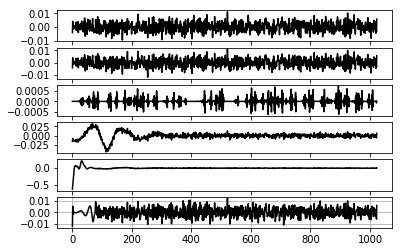

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 1)
for i, res in enumerate([res_visu, res_sure, res_bayes, 
                         res_spc3, res_cusum, res_cusum2]):
    ax[i].plot(res, 'k-')
    plt.grid(True)
plt.show()

### 2.2 Pré-Processing ECG data


In [94]:
import pickle

with open('sel_ecgs.pkl', 'rb') as p_pkl:
    ecgsSampl = pickle.load(p_pkl)

In [95]:
import pandas as pd
import numpy as np

df2 = pd.DataFrame(
    columns=['type', 'id', 'var_noise', 'initial_SNR', 'visu_SNR', 'sure_SNR', 
             'bayes_SNR', 'spc3_SNR', 'cusum_SNR', 'cusum2_SNR'])

for key, value in ecgsSampl.items():
    ys = value['ySamples']
    for i1, y in enumerate(ys):
        for varNoise in np.arange(0.001, 0.01, 0.001):
            tmp_dict_df2 = {'type': key, 'id': i1, 'var_noise': varNoise}
            
            if y.size != 1024:
                raise Exception('A dimensão utilizada não é indicada!')
            
            noise = np.random.normal(0, varNoise, size = 1024)
            
            tmp_dict_df2['initial_SNR'] = sig.snr_variances(y, noise)

            yN = y + noise
            
            coeffs = pywt.wavedec(yN, 'db8')
            
            fil_visu, _ = fil.filtration(coeffs, method='visu')
            fil_sure, _ = fil.filtration(coeffs, method='sure')
            fil_bayes, _ = fil.filtration(coeffs, method='bayes')
            fil_spc3, _ = fil.filtration(coeffs, method='spc')
            fil_cusum, _, _ = fil.cusumFiltration(coeffs, method='cusumTrad')
            fil_cusum2, _, _ = fil.cusumFiltration(coeffs, method='cusumDecay')
            
            rec_visu = pywt.waverec(fil_visu, 'db8')
            rec_sure = pywt.waverec(fil_sure, 'db8')
            rec_bayes = pywt.waverec(fil_bayes, 'db8')
            rec_spc3 = pywt.waverec(fil_spc3, 'db8')
            rec_cusum = pywt.waverec(fil_cusum, 'db8')
            rec_cusum2 = pywt.waverec(fil_cusum2, 'db8') 
            
#             res_visu = rec_visu - y
#             res_sure = rec_sure - y
#             res_bayes = rec_bayes - y
#             res_spc3 = rec_spc3 - y
#             res_cusum = rec_cusum - y
#             res_cusum2 = rec_cusum2 - y
            
#             tmp_dict_df1['visu_SNR'] = sig.snr_variances(y, res_visu)
#             tmp_dict_df1['sure_SNR'] = sig.snr_variances(y, res_sure)
#             tmp_dict_df1['bayes_SNR'] = sig.snr_variances(y, res_bayes)
#             tmp_dict_df1['spc3_SNR'] = sig.snr_variances(y, res_spc3)
#             tmp_dict_df1['cusum_SNR'] = sig.snr_variances(y, res_cusum)
#             tmp_dict_df1['cusum2_SNR'] = sig.snr_variances(y, res_cusum2)
            
            tmp_dict_df2['visu_SNR'] = sig.differential_snr_dB(yN, rec_visu, idealSignal=y, method='variances')
            tmp_dict_df2['sure_SNR'] = sig.differential_snr_dB(yN, rec_sure, idealSignal=y, method='variances')
            tmp_dict_df2['bayes_SNR'] = sig.differential_snr_dB(yN, rec_bayes, idealSignal=y, method='variances')
            tmp_dict_df2['spc3_SNR'] = sig.differential_snr_dB(yN, rec_spc3, idealSignal=y, method='variances')
            tmp_dict_df2['cusum_SNR'] = sig.differential_snr_dB(yN, rec_cusum, idealSignal=y, method='variances')
            tmp_dict_df2['cusum2_SNR'] = sig.differential_snr_dB(yN, rec_cusum2, idealSignal=y, method='variances')
            
            df2 = df2.append(tmp_dict_df2, ignore_index=True)

from time import ctime 
filename = "df_ecgs_res_"+ctime().replace(':', '_').replace(' ', '_') + ".csv"
df2.to_csv(filename)

ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equ

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet coefficients [2]! For more levels the method will be readapted, no garanties of performance
ADVICE: The t-dimension value for sure method used is equal to default, 1024!
ADVICE: The p value for spc method used is equal to default, 3!
ADVICE: This method was addaptated to 5 levels of wavelet co

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])

### Reading the results

In [14]:
import pandas as pd
import numpy as np

filename = 'df_donoho_signal_res_Thu_Apr_11_16_10_20_2019_size_400.csv'
df1 = pd.read_csv(filename)

In [3]:
import pandas as pd
filename = 'df_ecgs_res_Mon_Apr__8_22_50_08_2019.csv'
df2 = pd.read_csv(filename)

#### Create a new column with the better algo

In [15]:
index_visu = (df1['visu_SNR'] > df1['sure_SNR']) & \
             (df1['visu_SNR'] > df1['bayes_SNR']) & \
             (df1['visu_SNR'] > df1['spc3_SNR']) & \
             (df1['visu_SNR'] > df1['cusum_SNR']) & \
             (df1['visu_SNR'] > df1['cusum2_SNR'])

index_sure = (df1['sure_SNR'] > df1['visu_SNR']) & \
             (df1['sure_SNR'] > df1['bayes_SNR']) & \
             (df1['sure_SNR'] > df1['spc3_SNR']) & \
             (df1['sure_SNR'] > df1['cusum_SNR']) & \
             (df1['sure_SNR'] > df1['cusum2_SNR'])

index_bayes = (df1['bayes_SNR'] > df1['sure_SNR']) & \
             (df1['bayes_SNR'] > df1['visu_SNR']) & \
             (df1['bayes_SNR'] > df1['spc3_SNR']) & \
             (df1['bayes_SNR'] > df1['cusum_SNR']) & \
             (df1['bayes_SNR'] > df1['cusum2_SNR'])

index_spc3 = (df1['spc3_SNR'] > df1['sure_SNR']) & \
             (df1['spc3_SNR'] > df1['bayes_SNR']) & \
             (df1['spc3_SNR'] > df1['visu_SNR']) & \
             (df1['spc3_SNR'] > df1['cusum_SNR']) & \
             (df1['spc3_SNR'] > df1['cusum2_SNR'])

index_cusum = (df1['cusum_SNR'] > df1['sure_SNR']) & \
             (df1['cusum_SNR'] > df1['bayes_SNR']) & \
             (df1['cusum_SNR'] > df1['spc3_SNR']) & \
             (df1['cusum_SNR'] > df1['visu_SNR']) & \
             (df1['cusum_SNR'] > df1['cusum2_SNR'])

index_cusum2 = (df1['cusum2_SNR'] > df1['sure_SNR']) & \
             (df1['cusum2_SNR'] > df1['bayes_SNR']) & \
             (df1['cusum2_SNR'] > df1['spc3_SNR']) & \
             (df1['cusum2_SNR'] > df1['cusum_SNR']) & \
             (df1['cusum2_SNR'] > df1['visu_SNR'])

In [16]:
df1C = pd.DataFrame(df1, columns=list(df1.columns)+['Better'])

In [17]:
df1.loc[index_visu, 'Better'] = 'visu'
df1.loc[index_sure, 'Better'] = 'sure'
df1.loc[index_bayes, 'Better'] = 'bayes'
df1.loc[index_spc3, 'Better'] = 'spc3'
df1.loc[index_cusum, 'Better'] = 'cusum'
df1.loc[index_cusum2, 'Better'] = 'cusum2'

In [18]:
np.sum(df1['Better'] == 'visu')

338

In [19]:
np.sum(df1['Better'] == 'sure')

8

In [20]:
np.sum(df1['Better'] == 'bayes')

0

In [21]:
np.sum(df1['Better'] == 'spc3')

21

In [22]:
np.sum(df1['Better'] == 'cusum')

0

In [23]:
np.sum(df1['Better'] == 'cusum2')

33

# Testing

Re-pre-processing the ECG Dataset, use the ``statsWaveletFilt.miscellaneous``

In [6]:
import pickle

with open('sel_ecgs.pkl', 'rb') as p_pkl:
    ecgsSampl = pickle.load(p_pkl)

array([824, 824, 826, ..., 799, 798, 801], dtype=int16)